# National Library ALTO XML Text Mining Examples (Digitalia-Notebook)

version History

* 0.1 23.4.2019 Small text corrections
* 0.02 Digitalia-project, minor fixes
* 0.01 15.1.2019 (mika.koistinen@helsinki.fi)


# Thanks

# Kansalliskirjaston ALTO XML:n tekstinlouhintaesimerkkejä (Digitalia-notebook)

Versiohistoria

* 0.1  23.4.2019 Pieniä tekstikorjauksia
* 0.02 Digitalia-project, pieniä korjauksia
* 0.01 15.1.2019 (mika.koistinen@helsinki.fi)


# Kiitokset



<table><tr><td>
<img src="https://blogs.helsinki.fi/digitalia/files/2018/10/sosiaali_fi_90p.jpg" style="height:100px;width:100%">
    </td><td>
<img src="https://blogs.helsinki.fi/digitalia/files/2018/10/fi_EU_rgb_90p.jpg" style="height:100px;width:100%">
    </td><td>
<img src="https://blogs.helsinki.fi/digitalia/files/2015/10/digitalia_pien_512.png" style="height:70px;width:100%">
    </td></td></tr></table>

# Loading Data from ALTO xml  
https://digi.kansalliskirjasto.fi/opendata/submit
 1. Load data packages from above address. Pick e.g. sample file: "Newspapers 1771-1870 (Finnish texts) 1.9GB", 46607 sivua
 

 2. Unzip the package to the desired folder


# Datan lataaminen 

https://digi.kansalliskirjasto.fi/opendata/submit
 1. Lataa tietopaketit yllä olevasta osoitteesta. Valitse esimerkiksi näytetiedosto: "Sanomalehdet 1771-1870 (suomenkieliset tekstit) 1.9GB", 46607 sivua
 
 2. Pura paketti haluamaasi kansioon

# 1.Ladataan yksi tiedosto DataFrameen ym.

In [1]:
import os
#muuta tähän oma polku datapakettiin windows esim. D:\... jne
path="/home/mckoistt/digidata/1771-1870/fin/1870/" 


In [2]:
#tällä voi katsoa mitä tiedostoja kansiossa (poista kommentti # alusta)
sorted(os.listdir(path)) 

WindowsError: [Error 3] The system cannot find the path specified: '/home/mckoistt/digidata/1771-1870/fin/1870/*.*'

In [3]:
from bs4 import BeautifulSoup as bs
#valitaan yksi kansion tiedostoista
filename=path+"1457-4403_1870-02-24_8_001.xml"  
    

In [4]:
xmlsoup=bs(open(filename,"r"),"lxml")
xmldata=str(xmlsoup)


IOError: [Errno 2] No such file or directory: '/home/mckoistt/digidata/1771-1870/fin/1870/1457-4403_1870-02-24_8_001.xml'

In [9]:
#xmldata

In [48]:
import xml.etree.ElementTree as ET
import csv
import pandas as pd

#tree = ET.parse(filename)
#root = tree.getroot()

# open a file for writing

#datacsv = open('tesmi.csv', 'w')

#root[1][0]
#.findall("String")

In [57]:
#muokkaa XML-rakenteen pandas.DataFrame:ksi
#alkuperäinen funktio löytyy:
#http://www.austintaylor.io/lxml/python/pandas/xml/dataframe/2016/07/08/convert-xml-to-pandas-dataframe/
class XML2DataFrame:

    def __init__(self, xml_data):
        self.root = ET.XML(xml_data)

    def parse_root(self, root):
        return [self.parse_element(child) for child in iter(root)]

    def parse_element(self, element, parsed=None):
        if parsed is None:
            parsed = dict()
        for key in element.keys():
            parsed[key] = element.attrib.get(key)
        if element.text:
            parsed[element.tag] = element.text
        for child in list(element):
            self.parse_element(child, parsed)
        return parsed

    def process_data(self):
        structure_data = self.parse_root(self.root)
        return pd.DataFrame(structure_data)

In [58]:
#luodaan tietorakenne 
xml2df = XML2DataFrame(xmldata)
xml_dataframe = xml2df.process_data()
#näyttää tietorakenteen kappaleet
xml_dataframe.columns



Index(['align', 'cc', 'content', 'conversion', 'country', 'createdatetime',
       'fontfamily', 'fontsize', 'fontstyle', 'format', 'height', 'hpos', 'id',
       'lastmodified', 'physical_img_nr', 'points', 'scriptdatetime',
       'scriptversion', 'stylerefs', 'subs_content', 'subs_type', 'type',
       'version', 'vpos', 'wc', 'width', 'xmlversion',
       '{http://www.w3.org/2001/XMLSchema-instance}nonamespaceschemalocation',
       '{http://www.w3.org/2001/XMLSchema-instance}schemalocation',
       '{kk-ocr}alto', '{kk-ocr}altoxml', '{kk-ocr}bindingidentifier',
       '{kk-ocr}browseurl', '{kk-ocr}content', '{kk-ocr}contenttype',
       '{kk-ocr}copyright', '{kk-ocr}description', '{kk-ocr}filename',
       '{kk-ocr}identifier', '{kk-ocr}imageurl', '{kk-ocr}issue',
       '{kk-ocr}language', '{kk-ocr}lastmodified', '{kk-ocr}latestpublisher',
       '{kk-ocr}layout', '{kk-ocr}license', '{kk-ocr}measurementunit',
       '{kk-ocr}metadata', '{kk-ocr}ocrprocessing',
       '{kk-ocr}ocr

In [59]:
#etsitään OCR tiedoston otsikko
title=xml_dataframe['{kk-ocr}title']
title[0]

'Hämäläinen'

In [75]:
#luodaan tiedoston teksteistä pandas.DataFrame
strings=xmlsoup.find_all(["string","hyp"])


In [76]:
strings

[<string cc="112" content="Po" height="28" hpos="654" id="P1_ST00001" stylerefs="TXT_1" subs_content="Porissa." subs_type="HypPart1" vpos="1192" wc="0.89" width="43"></string>,
 <hyp content="-"></hyp>,
 <string cc="112150" content="rissa." height="26" hpos="649" id="P1_ST00002" stylerefs="TXT_1" subs_content="Porissa." subs_type="HypPart2" vpos="1229" wc="0.85" width="63"></string>,
 <string cc="10" content="m." height="15" hpos="644" id="P1_ST00003" stylerefs="TXT_1" vpos="1273" wc="0.94" width="30"></string>,
 <string cc="20" content="v." height="18" hpos="699" id="P1_ST00004" stylerefs="TXT_1" vpos="1271" wc="0.93" width="19"></string>,
 <string cc="411" content="22:" height="22" hpos="636" id="P1_ST00005" vpos="1304" wc="0.84" width="37"></string>,
 <string cc="2" content="—" height="4" hpos="692" id="P1_ST00006" vpos="1316" wc="0.85" width="26"></string>,
 <string cc="10" content="1:" height="21" hpos="652" id="P1_ST00007" vpos="1342" wc="0.98" width="20"></string>,
 <string cc="

In [77]:
#luodaan xmldata2 jossa stringit erikseen rakenteen sisällä
xmldata2='<?xml version="1.0" encoding="UTF-8"?><html><body>'
for s in strings:
    xmldata2=xmldata2+str(s)+"\n"
xmldata2=xmldata2+'</body></html>'

In [78]:
xmldata2

'<?xml version="1.0" encoding="UTF-8"?><html><body><string cc="112" content="Po" height="28" hpos="654" id="P1_ST00001" stylerefs="TXT_1" subs_content="Porissa." subs_type="HypPart1" vpos="1192" wc="0.89" width="43"></string>\n<hyp content="-"></hyp>\n<string cc="112150" content="rissa." height="26" hpos="649" id="P1_ST00002" stylerefs="TXT_1" subs_content="Porissa." subs_type="HypPart2" vpos="1229" wc="0.85" width="63"></string>\n<string cc="10" content="m." height="15" hpos="644" id="P1_ST00003" stylerefs="TXT_1" vpos="1273" wc="0.94" width="30"></string>\n<string cc="20" content="v." height="18" hpos="699" id="P1_ST00004" stylerefs="TXT_1" vpos="1271" wc="0.93" width="19"></string>\n<string cc="411" content="22:" height="22" hpos="636" id="P1_ST00005" vpos="1304" wc="0.84" width="37"></string>\n<string cc="2" content="—" height="4" hpos="692" id="P1_ST00006" vpos="1316" wc="0.85" width="26"></string>\n<string cc="10" content="1:" height="21" hpos="652" id="P1_ST00007" vpos="1342" wc

In [79]:
tree = ET.XML(xmldata2)


In [80]:
#luodaan pd.Dataframe ja tulostetaan se
data = []
for el in tree.iterfind('./*'):
    for i in el.iterfind('*'):
        data.append(dict(i.items()))
df = pd.DataFrame(data)        
df

,cc,content,height,hpos,id,stylerefs,subs_content,subs_type,vpos,wc,width
0,112,Po,28,654,P1_ST00001,TXT_1,Porissa.,HypPart1,1192,0.89,43
1,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,112150,rissa.,26,649,P1_ST00002,TXT_1,Porissa.,HypPart2,1229,0.85,63
3,10,m.,15,644,P1_ST00003,TXT_1,NaN,NaN,1273,0.94,30
4,20,v.,18,699,P1_ST00004,TXT_1,NaN,NaN,1271,0.93,19
5,411,22:,22,636,P1_ST00005,NaN,NaN,NaN,1304,0.84,37
6,2,—,4,692,P1_ST00006,NaN,NaN,NaN,1316,0.85,26
7,10,1:,21,652,P1_ST00007,NaN,NaN,NaN,1342,0.98,20
8,110,"70,",21,690,P1_ST00008,NaN,NaN,NaN,1342,0.97,28
9,010,16:,21,638,P1_ST00009,NaN,NaN,NaN,1379,0.99,36


In [112]:
#tulostetaan koko teksti (yhdistää huomioi hyppartit eli rivillä tavuviivaan katkeavat)
contents=""
for w in df['content']: 
   #if w!="-":        
   contents=contents+w+" "
   #cont=contents.replace("\n"," ")
contents2=contents.replace(" - ","")
print(contents2)     

Porissa. m. v. 22: — 1: 70, 16: — 10: — Sianliha . . . Munatin . . . Peninat . . . Heinät . . . . HtauranMyynit . Ofyran b: o Tuore nandan liha 4: — Lampaan liha > . 5:8: — 1: 40. 6: 50. — 25. — 85. Tori!) Hämeenlinnassa. m. p. Nukiit .... 18: — Nnkiin janhot a M' 1: 55. Ohrat . . . . 17: — Kaurat .... 9: — Woi g K . . . — 60. 21: — 19: 50, 1: 65. 1: 65. 18: — 17: — 10: 75. 9: 50.65, — 60. 4: 75. 3: 75. 6: 50. i: 25, 8: 50. 8: 50. i: 55. 1: 5. g:6: 40. — 45. — 30.85.80. — 95. i: 5. m. p. m. p. ittoja. Helsin- , Tu. gissa. rnSsa 9Wafn3toiutiifia @SmccnHnnäSfa: Hclinik, 16 p. Brocvfti T, Costiander ja maieteri Sbinan Helsiugistä Nordinilla, stiidcutti Nybergh Oclfiitijistä EestE.; 17 p. patrona Wahrcn Forf^sta, kapteni StjcrufchlNttz HelsiN" gioti, -aptcefari Granberg Taniperclta, profcssori Froötcrus Turusta Nordinilla, Bergman Hclsingistä, studentti Nultti) Laitilaiila, kauppias Ekman Forsaöta, Palmroth itöngdöaltd, Eugberg ja Bergström §elfingt«tä keslk., frökynä.Ncrwander Säätsiuäcot

In [115]:
#luodaan sanatokenit
#NLTK
#pip install nltk
import nltk 
tokens=nltk.word_tokenize(contents2)
tokens[0:10]

['Porissa', '.', 'm.', 'v.', '22', ':', '—', '1', ':', '70']

# Word Frequencies /sanojen esiintymistiheydet

In [199]:
#removing stopwords
from nltk.corpus import stopwords
import io
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#sulkusanat
stop_words=set(stopwords.words('finnish'))
#print(stopwords[0:10],len(stopwords))
#filtered_sentence = [w for w in content if not w in stop_words]

#sulkusanat poistetaan
filtered_content=[]
for r in tokens:
    #print(r)
    if not r in stop_words:
        filtered_content.append(r)
"""
#sulkusanat alle 1 merkin sanat ja yli 20 merkin sanat poistetaan
filtered_content2=[]
for r in tokens:
    #print(r)
    if not r in stop_words and len(r) <20 and len(r)>1: # and
        filtered_content2.append(r)
"""        

'\n#sulkusanat alle 1 merkin sanat ja yli 20 merkin sanat poistetaan\nfiltered_content2=[]\nfor r in tokens:\n    #print(r)\n    if not r in stop_words and len(r) <20 and len(r)>1: # and\n        filtered_content2.append(r)\n'

In [200]:
#tulostetaan osa eritavoin esikäsitellyistä tokeneista
freqz=nltk.FreqDist(tokens)
freqz2=nltk.FreqDist(filtered_content)
freqz3=nltk.FreqDist(filtered_content2)

print("koko teksti")
print(freqz.most_common()[0:15])
print("stopwords poistettu")
print(freqz2.most_common()[0:15])

"""
print("stopwords ja alle 4 merkin sanat poistettu")
print(freqz3.most_common()[0:15])
#freqz3.most_common()
"""

koko teksti
[('.', 164), (',', 106), (':', 45), ('ja', 31), ('pnä', 25), ('—', 23), ('p.', 22), (';', 15), ('wainaan', 14), ('pit', 13), ('1', 13), ('ensit', 12), ('I.', 9), (')', 7), ('maalisk', 6)]
stopwords poistettu
[('.', 164), (',', 106), (':', 45), ('pnä', 25), ('—', 23), ('p.', 22), (';', 15), ('wainaan', 14), ('pit', 13), ('1', 13), ('ensit', 12), ('I.', 9), (')', 7), ('maalisk', 6), ('A.', 6)]


'\nprint("stopwords ja alle 4 merkin sanat poistettu")\nprint(freqz3.most_common()[0:15])\n#freqz3.most_common()\n'

# WordClouds / sanapilvet 

In [131]:
#löytyy täältä esimerkkiä 
#https://github.com/amueller/word_cloud
#!pip install wordcloud

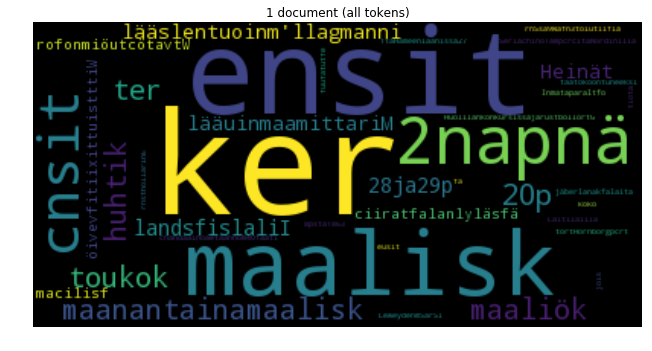

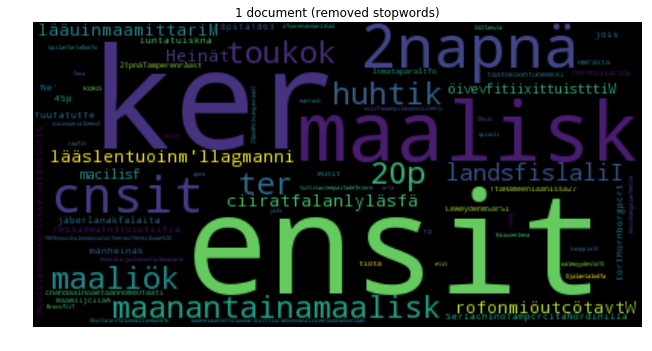

sanojen määrä: 7188 7029


In [201]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


tokens_str = ''.join(tokens)
fig = plt.figure(figsize=(24, 14)) 
wordcloud=WordCloud().generate(tokens_str)
#wordcloud = WordCloud(max_font_size=50,min_font_size=5).generate(content_str)
plt.subplot(221)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("1 document (all tokens)")
plt.show()


fig = plt.figure(figsize=(24, 14)) 
content_str2 = ''.join(filtered_content)
wordcloud2=WordCloud().generate(content_str2)
#wordcloud2 = WordCloud(max_font_size=40,min_font_size=5).generate(content_str2)
plt.subplot(222)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.title("1 document (removed stopwords)")


plt.axis("off")
plt.show()

"""
fig = plt.figure(figsize=(24, 14)) 

content_str3 = ''.join(filtered_content2)
wordcloud2=WordCloud().generate(content_str3)
#wordcloud3 = WordCloud(max_font_size=40,min_font_size=5).generate(content_str3)
plt.subplot(223)
plt.imshow(wordcloud3, interpolation="bilinear")
plt.title("1 document (removed stopwords and removed words less than 3 )")


plt.axis("off")
plt.show()
"""
print("sanojen määrä:",len(content_str),len(content_str2))#,len(content_str3))
#content_str2




# 2. Useampi tiedosto kansiosta


In [206]:
# loading all xml files from the folders / ladataan kaikki tiedostot kansiosta
import os
files=os.listdir(path)
path="/home/mckoistt/digidata/1771-1870/fin/1870/" #muuta tähän oma polku datapakettiin windows esim. D:\... jne
#sorted(os.listdir(path))



In [204]:
#!huom tässä menee hetkinen
strings2=[]
for file1 in files:
    filename=path+file1
    xmlsoup=bs(open(filename,"r"),"lxml")
    strings2.extend(xmlsoup.find_all("string"))

print("sanojen määrä kaikki sivut kansiossa:",len(strings2))
    
    

sanojen määrä kaikki sivut kansiossa: 4318558


In [215]:
#strings2[0:100]

In [216]:
content22=[stri2['content'].lower() for stri2 in strings2[0:]]
len(content22)

4318558

In [39]:
#poistetaan alle 2 merkin pituiset sanat
content2=[stri2 for stri2 in content22 if len(stri2)>1]
len(content2)

358150

In [40]:
#poistetaan ohitettavat sanat (stopwords)
filtered_content3=[]
for r in content2:
    #print(r)
    if not r in stop_words:
        filtered_content2.append(r)
len(filtered_content2)

299558

In [41]:
freqz3=nltk.FreqDist(content2)
freqz3.most_common()[0:15]

freqz4=nltk.FreqDist(filtered_content2)

print(freqz3.most_common()[0:10])
print(freqz4.most_common()[0:10])



[('ja', 11005), ('on', 5825), ('että', 3001), ('oli', 2188), ('ei', 2165), ('hän', 1690), ('niin', 1657), ('joka', 1511), ('se', 1408), ('kuin', 1383)]
[('p.', 1365), ('--', 861), ('owat', 792), ('m.', 763), ('jo', 747), ('maan', 682), ('a.', 589), ('k.', 562), ('waan', 546), ('suomen', 517)]


# WordClouds (all pages in folder)

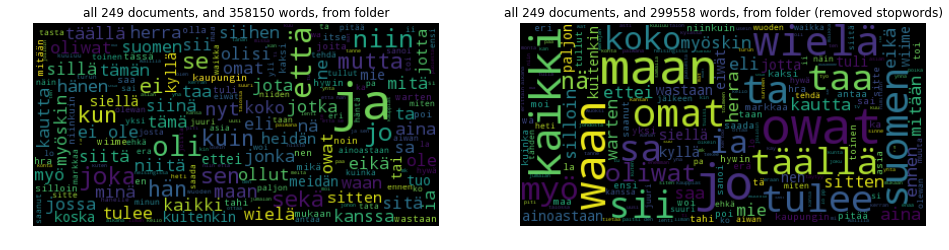

In [42]:
content_str2 = ' '.join(content2)

"""
wordcloud2=wc.WordCloud().generate(content_str2)
#plt.subplots(figsize=(20, 10))
plt.figsize=(20,10)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
"""

fig = plt.figure(figsize=(16, 10))
plt.subplot(223)
wordcloud2 = wc.WordCloud(max_font_size=50,min_font_size=5).generate(content_str2)
#plt.figure()
plt.imshow(wordcloud2, interpolation="bilinear")
plt.title("all "+str(len(files))+" documents, and "+str(len(content2))+" words, from folder")
#plt.title("all "+str(len(files))+" documents from folder")
#plt.subplots(figsize=(20, 10))
plt.axis("off")


content_str3 = ' '.join(filtered_content2)
"""
wordcloud2=wc.WordCloud().generate(content_str3)
plt.imshow(wordcloud2, interpolation='bilinear')
#plt.subplots(figsize=(20))
plt.title("all "+str(len(files))+" documents from folder  (removed stopwords)")
plt.axis("off")
"""
#fig = plt.figure(figsize=(16, 10))
plt.subplot(224)
wordcloud3 = wc.WordCloud(max_font_size=50,min_font_size=5).generate(content_str3)
plt.imshow(wordcloud3, interpolation="bilinear")

plt.title("all "+str(len(files))+" documents, and "+str(len(filtered_content2))+" words, from folder (removed stopwords)")
#plt.subplots(figsize=(20, 10))
plt.axis("off")
plt.show()








# Sentiment analysis (alustavasti)

In [1]:
# splitting text to sentences

In [212]:
filtered_content2

['Porissa',
 'm.',
 'v.',
 '22',
 '70',
 '16',
 '10',
 'Sianliha',
 'Munatin',
 'Peninat',
 'Heinät',
 'HtauranMyynit',
 'Ofyran',
 'Tuore',
 'nandan',
 'liha',
 'Lampaan',
 'liha',
 '5:8',
 '40',
 '50',
 '25',
 '85',
 'Tori',
 'Hämeenlinnassa',
 'm.',
 'p.',
 'Nukiit',
 '...',
 '18',
 'Nnkiin',
 'janhot',
 '55',
 'Ohrat',
 '17',
 'Kaurat',
 '...',
 'Woi',
 '60',
 '21',
 '19',
 '50',
 '65',
 '65',
 '18',
 '17',
 '10',
 '75',
 '50.65',
 '60',
 '75',
 '75',
 '50.',
 '25',
 '50',
 '50.',
 '55',
 '5.',
 'g:6',
 '40',
 '45',
 '30.85.80',
 '95.',
 '5.',
 'm.',
 'p.',
 'm.',
 'p.',
 'ittoja',
 'Helsin-',
 'Tu',
 'gissa',
 'rnSsa',
 '9Wafn3toiutiifia',
 'SmccnHnnäSfa',
 'Hclinik',
 '16',
 'p.',
 'Brocvfti',
 'Costiander',
 'maieteri',
 'Sbinan',
 'Helsiugistä',
 'Nordinilla',
 'stiidcutti',
 'Nybergh',
 'Oclfiitijistä',
 'EestE',
 '17',
 'p.',
 'patrona',
 'Wahrcn',
 'Forf^sta',
 'kapteni',
 'StjcrufchlNttz',
 'HelsiN',
 "''",
 'gioti',
 '-aptcefari',
 'Granberg',
 'Taniperclta',
 'profcssori'

In [207]:
len(content_str2)

7029

In [210]:
from nltk.tokenize import sent_tokenize
sent_tokenize_list = sent_tokenize(content_str2)
#sent_tokenize_list

["Porissa.m.v.22:—1:70,16:—10:—Sianliha...Munatin...Peninat...Heinät....HtauranMyynit.Ofyranb:oTuorenandanliha4:—Lampaanliha>.5:8:—1:40.6:50.—25.—85.Tori!)Hämeenlinnassa.m.p.Nukiit....18:—NnkiinjanhotaM'1:55.Ohrat....17:—Kaurat....9:—WoigK...—60.21:—19:50,1:65.1:65.18:—17:—10:75.9:50.65,—60.4:75.3:75.6:50.i:25,8:50.8:50.i:55.1:5.g:6:40.—45.—30.85.80.—95.i:5.m.p.m.p.ittoja.Helsin-,Tu.gissa.rnSsa9Wafn3toiutiifia@SmccnHnnäSfa:Hclinik,16p.BrocvftiT,CostiandermaieteriSbinanHelsiugistäNordinilla,stiidcuttiNyberghOclfiitijistäEestE.;17p.patronaWahrcnForf^sta,kapteniStjcrufchlNttzHelsiN''gioti,-aptcefariGranbergTaniperclta,profcssoriFroötcrusTurustaNordinilla,BergmanHclsingistä,studenttiNultti)Laitilaiila,kauppiasEkmanForsaöta,Palmrothitöngdöaltd,EugbergBergström§elfingt«täkeslk.,frökynä.NcrwanderSäätsiuäcotä,EtrfoljevranfronwaBergroth3tyttärenkanvsaSknvuxtltopastorstaHageldergilla;18p.frouwaAxecn.pattulaöta,frökyuä£jäberlanakfalaita,inftnörit©ouranbecTampercltaSlutenHelsingistäkeötk.;19p.»ara

In [209]:
len(sent_tokenize_list)

2

# Topic Modeling

In [158]:
#based on 
#https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/
#read all docs into the corpora
import os
files=os.listdir(path)
FILES=[]
doc_complete=[]
for ind in range(0,len(files)):
    filename=path+files[ind]
    FILES.append(filename)
    xmlsoup=bs(open(filename,"r"),"xml")
    strings=xmlsoup.find_all("String")
    strings2=[]
    for str1 in strings:
        strings2.append(str1['CONTENT'].lower())
    doc_complete.append(strings2)

len(doc_complete),len(content2),len(filtered_content2)



(249, 358150, 299558)

In [162]:
#doc_complete[248]

In [140]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('finnish'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

"""
filtered_content=[]
for r in content:
    #print(r)
    if not r in stop_words:
        filtered_content.append(r)
"""
def clean(doc):
    doc2=[word for word in doc if len(word)>3]       
    stop_free = " ".join([i for i in doc2 if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

#doc_clean = []#[clean(doc).split() 
#for doc in doc_complete:
#    doc_clean.append(clean(doc))
    
doc_clean = [clean(doc).split() for doc in doc_complete]        
#clean(doc_complete[248])

In [141]:
#doc_clean=docs2#filtered_content2#map(unicode,filtered_content2)
# Importing Gensim
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean )
#dictionary
# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]



In [149]:
# Creating the object for LDA model using gensim library
#takes about 12minutes
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=100, id2word = dictionary, passes=50)

In [157]:
#Results
print(ldamodel.print_topics(num_topics=100, num_words=3))


[(0, '0.005*"klo" + 0.003*"owat" + 0.002*"maan"'), (1, '0.007*"pnä" + 0.005*"wiime" + 0.004*"owat"'), (2, '0.006*"15000" + 0.006*"omat" + 0.005*"kirj"'), (3, '0.006*"owat" + 0.004*"siellä" + 0.004*"oliwat"'), (4, '0.005*"venäjällä" + 0.004*"asukasta" + 0.003*"kovin"'), (5, '0.006*"kello" + 0.005*"pnä" + 0.004*"maaliskuun"'), (6, '0.011*"klo" + 0.004*"1892" + 0.003*"perjantaina"'), (7, '0.005*"kello" + 0.004*"turun" + 0.003*"owat"'), (8, '0.002*"30800" + 0.002*"44870" + 0.002*"34980"'), (9, '0.003*"kotkan" + 0.003*"talon" + 0.002*"siten"'), (10, '0.005*"täällä" + 0.005*"owat" + 0.005*"pnä"'), (11, '0.007*"suomen" + 0.005*"wenäjän" + 0.005*"omat"'), (12, '0.000*"owat" + 0.000*"maan" + 0.000*"waan"'), (13, '0.000*"owat" + 0.000*"maan" + 0.000*"kaikki"'), (14, '0.005*"hukkanen" + 0.004*"kaikki" + 0.004*"wilho"'), (15, '0.000*"waan" + 0.000*"owat" + 0.000*"wielä"'), (16, '0.002*"engl" + 0.002*"werinen" + 0.002*"perätysten"'), (17, '0.007*"klo" + 0.005*"halla" + 0.004*"laulu"'), (18, '0.004*

In [153]:
print(ldamodel.print_topics(num_topics=10, num_words=5))

[(60, '0.004*"markka" + 0.003*"uudestaan" + 0.003*"ennen" + 0.003*"1882" + 0.003*"walittiin"'), (76, '0.005*"maan" + 0.005*"suomen" + 0.005*"tulee" + 0.004*"pnä" + 0.004*"siis"'), (70, '0.007*"ruotsila" + 0.005*"raski" + 0.005*"waan" + 0.004*"tulee" + 0.003*"täällä"'), (17, '0.007*"klo" + 0.005*"halla" + 0.004*"laulu" + 0.004*"kapt" + 0.003*"helsingin"'), (38, '0.004*"jumalan" + 0.004*"täällä" + 0.003*"tahi" + 0.003*"lasten" + 0.002*"lukijat"'), (50, '0.002*"seurassaan" + 0.002*"myötäwänä" + 0.002*"syrjälle" + 0.001*"toiwoaksemme" + 0.001*"takoja"'), (47, '0.005*"täällä" + 0.005*"omat" + 0.004*"kaikki" + 0.003*"eikä" + 0.003*"mitään"'), (13, '0.000*"owat" + 0.000*"maan" + 0.000*"kaikki" + 0.000*"pnä" + 0.000*"wielä"'), (27, '0.007*"maan" + 0.006*"kanawan" + 0.004*"kanawa" + 0.004*"monta" + 0.003*"suezin"'), (15, '0.000*"waan" + 0.000*"owat" + 0.000*"wielä" + 0.000*"kirj" + 0.000*"maan"')]


In [121]:
len(doc_complete),len(doc_clean)

(249, 249)

In [ ]:
TOPIC MODELING2 https://de.dariah.eu/tatom/topic_model_python.html

In [195]:
#FILES
FILES2=[]
import os
for file in os.listdir(path):
    if file.endswith(".txt"):
        FILES2.append("".join([path,file]))
        #print(os.path.join(path, file))


In [209]:
#FILES2

In [199]:
############

import numpy as np
#FILES[0:4]
stop = list(set(stopwords.words('finnish')))

import sklearn.feature_extraction.text as text
vectorizer = text.CountVectorizer(input='filename', stop_words=stop, min_df=20)
dtm = vectorizer.fit_transform(FILES2).toarray()
vocab = np.array(vectorizer.get_feature_names())
#dtm.shape()


In [200]:
dtm.shape,len(vocab)

((248, 1546), 1546)

In [210]:
from sklearn import decomposition
num_topics = 10
num_top_words = 10
clf = decomposition.NMF(n_components=num_topics, random_state=1)



In [211]:
doctopic = clf.fit_transform(dtm)

In [212]:
topic_words = []
for topic in clf.components_:
   word_idx = np.argsort(topic)[::-1][0:num_top_words]
   topic_words.append([vocab[i] for i in word_idx])

In [213]:
doctopic = doctopic / np.sum(doctopic, axis=1, keepdims=True)

In [214]:
novel_names = []
"""
for fn in FILES:
   basename = os.path.basename(fn)
   name, ext = os.path.splitext(basename)
   name = name.rstrip('0123456789')
   novel_names.append(name)
"""
# turn this into an array so we can use NumPy functions
#novel_names = np.asarray(novel_names)
novel_names=np.asarray(FILES2)
doctopic_orig = doctopic.copy()

# use method described in preprocessing section
num_groups = len(set(novel_names))
doctopic_grouped = np.zeros((num_groups, num_topics))

for i, name in enumerate(sorted(set(novel_names))):
        doctopic_grouped[i, :] = np.mean(doctopic[novel_names == name, :], axis=0)

doctopic = doctopic_grouped

In [207]:
novels = sorted(set(novel_names))

print("Top NMF topics in...")


for i in range(len(doctopic)):
        top_topics = np.argsort(doctopic[i,:])[::-1][0:3]
        top_topics_str = ' '.join(str(t) for t in top_topics)
        print("{}: {}".format(novels[i], top_topics_str))
    


Top NMF topics in...
/home/mckoistt/progs/ASDM/Text_Mining/asdm-class/xmldata/0024-8045_1910-01-01_9_18.combined1234567.txt: 18 14 13
/home/mckoistt/progs/ASDM/Text_Mining/asdm-class/xmldata/0031-4188_1900-03-01_3_13.combined1234567.txt: 17 9 18
/home/mckoistt/progs/ASDM/Text_Mining/asdm-class/xmldata/0031-4188_1904-04-01_4_29.combined1234567.txt: 6 13 9
/home/mckoistt/progs/ASDM/Text_Mining/asdm-class/xmldata/0031-4188_1908-04-01_8_14.combined1234567.txt: 17 8 2
/home/mckoistt/progs/ASDM/Text_Mining/asdm-class/xmldata/0031-4188_1910-12-01_24_28.combined1234567.txt: 2 17 7
/home/mckoistt/progs/ASDM/Text_Mining/asdm-class/xmldata/0031-4188_1918-06-01_10_11.combined1234567.txt: 9 16 19
/home/mckoistt/progs/ASDM/Text_Mining/asdm-class/xmldata/0039-5528_1894-09-24_8-9_11.combined1234567.txt: 6 18 13
/home/mckoistt/progs/ASDM/Text_Mining/asdm-class/xmldata/0039-5528_1900-01-26_1_15.combined1234567.txt: 18 14 9
/home/mckoistt/progs/ASDM/Text_Mining/asdm-class/xmldata/0039-5528_1904-09-24_9_2

In [216]:
for t in range(len(topic_words)):
   print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15])))

Topic 0: omat jo maan ia wielä tulee eikä täällä kaikki ta
Topic 1: lo pp 12 10 kello 50 ia posti 20 nä
Topic 2: 20 10 12 50 40 25 kello 30 11 täten
Topic 3: 000 15 maan markkaa mk wiime kaa owat siis jotta
Topic 4: nä wiime ia kylässä wuoden ta pitäjän suomen kuun läänin
Topic 5: 11 111 ia 15 10 oliwat kappalainen sa ta 000
Topic 6: owat suomen hra tulee warten markkaa wielä johdosta maan ta
Topic 7: maan herra eräs sa sitten nen wiime silloin kaikki kuten
Topic 8: eli wuoden siis suomen wiime yhteensä 28 nä kuitenkin sitten
Topic 9: waan jo owat kaikki oliwat ta wielä täällä mitään sa
